In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from scipy import signal

In [3]:
class Point_Cloud():
    def __init__(self, path, frame_size=60, eps=0.1, min_samples=5):
        self.path = path
        self.frame_size = frame_size
        self.data_frames = None
        self.data_all = None
        self.all_cluster = None
        self.all_cluster_by_frame = None

        self.parse_data()
        self.run_DBSCAN(eps=eps, min_samples=min_samples)

        

    
    def parse_data(self, max=3, min=0.3):
        print("Loading Point Cloud Data...")
        with open(self.path, "r") as f:
            dataRaw = f.read()
            f.close()
        point_data = {"pointID":[], "x":[], "y":[], "z":[]}

        for data in dataRaw.split("---\n")[:-1]:
            line = data.split("\n")
            if np.float(line[7].split(": ")[1]) < max and np.float(line[7].split(": ")[1]) > min:
                point_data["pointID"].append(np.float(line[6].split(": ")[1]) )
                point_data["x"].append(np.float(line[7].split(": ")[1]) )
                point_data["y"].append(np.float(line[8].split(": ")[1]) )
                point_data["z"].append(np.float(line[9].split(": ")[1]) )

        for key in point_data.keys():
            print(key, len(point_data[key]))

        data_frames = []
        for f_num in np.arange(0, len(point_data["x"])//self.frame_size):
            s = f_num*self.frame_size
            e = (f_num+1)*self.frame_size
            frame = [point_data["x"][s:e], point_data["y"][s:e], point_data["z"][s:e]]
            data_frames.append(frame)

        self.data_frames = np.array(data_frames)
        print("data_frames shape:", np.shape(self.data_frames))
        print("Loading Success!")
    
    def run_DBSCAN(self, eps=0.1, min_samples=5):
        self.data_all = np.concatenate(self.data_frames.T, axis=1).T
        self.all_cluster = np.array(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(self.data_all))

        self.all_cluster_by_frame = []
        for i, frame in enumerate(self.data_frames):
            cluster = np.array(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(frame.T))
            self.all_cluster_by_frame.append(cluster)
        print("Clustering Success!")
        

    def get_cluster_items(self, cluster_idx=0, frame_id=None):
        if frame_id != None:
            idx = np.argwhere(self.all_cluster_by_frame[frame_id] == cluster_idx).T
            return self.data_frames[frame_id][idx][0]
        else:
            idx = np.argwhere(self.all_cluster == cluster_idx).T
            return self.data_all[idx][0]
    
    def get_cluster(self, frame_id=None):
        out_cluster = None
        if frame_id != None:
            out_cluster = self.all_cluster_by_frame[frame_id]
        else:
            out_cluster = self.all_cluster
        return out_cluster

    def label2color(self, labels):
        color = ["b", "g", "r", "c", "m", "y", "k", "w"]
        out = []
        for i,l in enumerate(labels):
            out.append(color[l])
        return out
    
    def get_label_analysis(self, lables):
        num = np.max(lables) + 1
        print("noises: ",  len(np.argwhere(lables == -1)), len(np.argwhere(lables == -1))/len(lables))

        color = ["b", "g", "r", "c", "m", "y", "k", "w"]
        for i in range(num):
            print(i, color[i], len(np.argwhere(lables == i)), len(np.argwhere(lables == i))/len(lables)) 
    
    def plot_cluster(self, cluster_idx, frame_id):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        point_scatter = ax.scatter3D(self.data_frames[frame_id][0][cluster_idx], self.data_frames[frame_id][1][cluster_idx], self.data_frames[frame_id][2][cluster_idx], cmap="Greens")
        # ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.view_init(elev=30, azim=135)

        fig = plt.figure()
        plt.scatter(self.data_frames[frame_id][1][cluster_idx], self.data_frames[frame_id][2][cluster_idx])
        plt.xlabel("y")
        plt.ylabel("z")

    def plot_points(self, frame_id=0, cluster_idx=0):
        clustering = self.get_cluster(frame_id)

        colors = self.label2color(clustering)

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.data_frames[frame_id][0], self.data_frames[frame_id][1], self.data_frames[frame_id][2], c=colors)
        ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.view_init(elev=30, azim=135)
        

        print("Cluster Pred: ")
        self.get_label_analysis(clustering)

        self.plot_cluster(np.argwhere(clustering == cluster_idx), frame_id)
    


b : blue.
g : green.
r : red.
c : cyan.
m : magenta.
y : yellow.
k : black.
w : white

Loading Point Cloud Data...


<ipython-input-3-f01e4900f5e5>:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.float(line[7].split(": ")[1]) < max and np.float(line[7].split(": ")[1]) > min:
<ipython-input-3-f01e4900f5e5>:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_data["pointID"].append(np.float(line[6].split(": ")[1]) )
<ipython-input-3-f01e4900f5e

pointID 17785
x 17785
y 17785
z 17785
data_frames shape: (296, 3, 60)
Loading Success!
Clustering Success!
Cluster Pred: 
noises:  16 0.26666666666666666
0 b 19 0.31666666666666665
1 g 13 0.21666666666666667
2 r 12 0.2


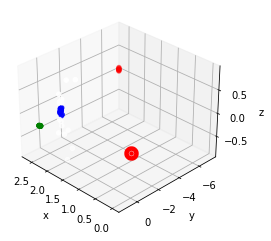

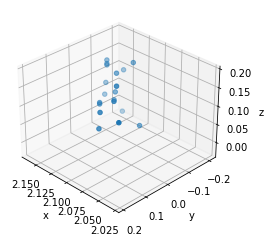

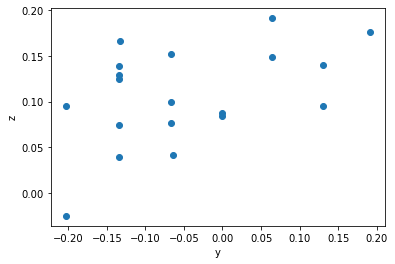

In [5]:
file_name = "xin_standing_still_1min_1.93m.txt"
pc_2 = Point_Cloud(path=file_name, frame_size=60, eps=0.1, min_samples=5)
pc_2.plot_points(frame_id=100, cluster_idx=0)

In [3]:
# file_name = "/Users/xin/Desktop/millimeter wave/code_exp/cloud_point/stationary_box_facing_up_1m.txt"
# pc = Point_Cloud(path=file_name, frame_size=60, eps=0.1, min_samples=5)
# pc.plot_points(frame_id=6, cluster_idx=1)

In [6]:
class Vital_Signal():
    def __init__(self, data, fs=60):
        self.data = data
        self.fs = fs


    def get_vital_signal(self, low=0.85, high=1.5, nperseg=10):
        f, t, Sxx = signal.spectrogram(self.data, fs=self.fs, nperseg=nperseg)
        
        idx = np.argwhere(np.logical_and(f>=low, f<=high))
        heart_f = f[idx].squeeze()
        heart_Sxx = Sxx[idx].squeeze()

        plt.pcolormesh(t, heart_f, heart_Sxx, shading='nearest')
        # plt.title("Heartneat")
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()

        


In [8]:
me = pc_2.get_cluster_items(frame_id=None, cluster_idx=0)
np.shape(me)

(8761, 3)

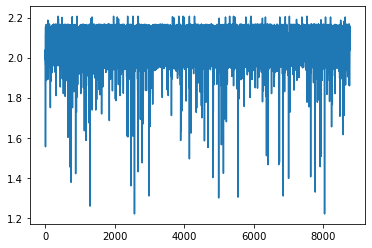

In [14]:
X = me[:,0]

plt.plot(np.arange(len(X)), X )

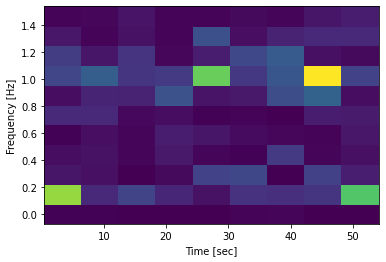

In [24]:
vs = Vital_Signal(X, fs=150)
vs.get_vital_signal(low=0.0, high=1.5, nperseg=1024)